In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value,plot_confusion_matrix
from jcopml.feature_importance import mean_score_decrease

# from jcopml.plot import 

In [2]:
path = r'virus' # or unix / linux / mac path

# Get the files from the path provided in the OP
files = Path(path).glob('*.csv') # .rglob to get subdirectories

# Read the files into dataframes
dfv = [pd.read_csv(f) for f in files]

In [3]:
path = r'bakteri' # or unix / linux / mac path

# Get the files from the path provided in the OP
files = Path(path).glob('*.csv') # .rglob to get subdirectories

# Read the files into dataframes
dfb = [pd.read_csv(f) for f in files]

In [4]:
path = r'kontrol' # or unix / linux / mac path

# Get the files from the path provided in the OP
files = Path(path).glob('*.csv') # .rglob to get subdirectories

# Read the files into dataframes
dfk = [pd.read_csv(f) for f in files]

Define function

In [5]:
def mean(series):
    # Find the sum of the Series
    total_sum = series.sum()
    
    # Find the length of the Series
    n = len(series)
    
    # Return the mean
    return total_sum / n

    
import math
def std(data):
    # If data is a pandas Series, convert it to a list
    if isinstance(data, pd.Series):
        data = data.tolist()
    
    # Calculate the mean
    mean = sum(data) / len(data)
    
    # Calculate the sum of squared differences from the mean
    sum_squared_diff = sum((x - mean) ** 2 for x in data)
    
    # Calculate the variance
    variance = sum_squared_diff / len(data)
    
    # Calculate the standard deviation
    std_dev = math.sqrt(variance)
    
    return std_dev

def var(data):
    # If data is a pandas Series, convert it to a list
    if isinstance(data, pd.Series):
        data = data.tolist()
    
    # Calculate the mean
    mean = sum(data) / len(data)
    
    # Calculate the sum of squared differences from the mean
    sum_squared_diff = sum((x - mean) ** 2 for x in data)
    
    # Calculate the sample variance (divide by n - 1 for sample variance)
    sample_variance = sum_squared_diff / (len(data) - 1)
    
    return sample_variance

Convert

In [6]:
ndfv=[]
for x in range(len(dfv)):
    a=[
        dfv[x]['S1'][0]-min(dfv[x]['S1']),
        dfv[x]['S2'][0]-min(dfv[x]['S2']),
        dfv[x]['S3'][0]-min(dfv[x]['S3']),
        dfv[x]['S4'][0]-min(dfv[x]['S4']),
        dfv[x]['S5'][0]-min(dfv[x]['S5']),
        dfv[x]['S6'][0]-min(dfv[x]['S6']),
        dfv[x]['S7'][0]-min(dfv[x]['S7']),
        dfv[x]['S8'][0]-min(dfv[x]['S8']),
        dfv[x]['S9'][0]-min(dfv[x]['S9']),
        dfv[x]['S10'][0]-min(dfv[x]['S10'])
    ]
    index=a.index(max(a))
    if (index==0):
        tipe='S1'
    if (index==1):
        tipe='S2'
    if (index==2):
        tipe='S3'
    if (index==3):
        tipe='S4'
    if (index==4):
        tipe='S5'
    if (index==5):
        tipe='S6'
    if (index==6):
        tipe='S7'
    if (index==7):
        tipe='S8'
    if (index==8):
        tipe='S9'
    if (index==9):
        tipe='S10'
        
    penjumlah=dfv[0][tipe]-dfv[0][tipe][0]
    min(penjumlah)
    
    if (min(penjumlah[:651])<-50):
        a=[
            dfv[x]['S1']-penjumlah,
            dfv[x]['S2']-penjumlah,
            dfv[x]['S3']-penjumlah,
            dfv[x]['S4']-penjumlah,
            dfv[x]['S5']-penjumlah,
            dfv[x]['S6']-penjumlah,
            dfv[x]['S7']-penjumlah,
            dfv[x]['S8']-penjumlah,
            dfv[x]['S9']-penjumlah,
            dfv[x]['S10']-penjumlah
        ]
    else:
        a=[
            dfv[x]['S1'],
            dfv[x]['S2'],
            dfv[x]['S3'],
            dfv[x]['S4'],
            dfv[x]['S5'],
            dfv[x]['S6'],
            dfv[x]['S7'],
            dfv[x]['S8'],
            dfv[x]['S9'],
            dfv[x]['S10']
        ]
    
    ndfv.append(a)
    
    


In [7]:
ndfb=[]
for x in range(len(dfb)):
    a=[
        dfb[x]['S1'][0]-min(dfb[x]['S1']),
        dfb[x]['S2'][0]-min(dfb[x]['S2']),
        dfb[x]['S3'][0]-min(dfb[x]['S3']),
        dfb[x]['S4'][0]-min(dfb[x]['S4']),
        dfb[x]['S5'][0]-min(dfb[x]['S5']),
        dfb[x]['S6'][0]-min(dfb[x]['S6']),
        dfb[x]['S7'][0]-min(dfb[x]['S7']),
        dfb[x]['S8'][0]-min(dfb[x]['S8']),
        dfb[x]['S9'][0]-min(dfb[x]['S9']),
        dfb[x]['S10'][0]-min(dfb[x]['S10'])
    ]
    index=a.index(max(a))
    if (index==0):
        tipe='S1'
    if (index==1):
        tipe='S2'
    if (index==2):
        tipe='S3'
    if (index==3):
        tipe='S4'
    if (index==4):
        tipe='S5'
    if (index==5):
        tipe='S6'
    if (index==6):
        tipe='S7'
    if (index==7):
        tipe='S8'
    if (index==8):
        tipe='S9'
    if (index==9):
        tipe='S10'
        
    penjumlah=dfb[0][tipe]-dfb[0][tipe][0]
    min(penjumlah)
    
    if (min(penjumlah[:651])<-50):
        a=[
            dfb[x]['S1']-penjumlah,
            dfb[x]['S2']-penjumlah,
            dfb[x]['S3']-penjumlah,
            dfb[x]['S4']-penjumlah,
            dfb[x]['S5']-penjumlah,
            dfb[x]['S6']-penjumlah,
            dfb[x]['S7']-penjumlah,
            dfb[x]['S8']-penjumlah,
            dfb[x]['S9']-penjumlah,
            dfb[x]['S10']-penjumlah
        ]
    else:
        a=[
            dfb[x]['S1'],
            dfb[x]['S2'],
            dfb[x]['S3'],
            dfb[x]['S4'],
            dfb[x]['S5'],
            dfb[x]['S6'],
            dfb[x]['S7'],
            dfb[x]['S8'],
            dfb[x]['S9'],
            dfb[x]['S10']
        ]
    
    ndfb.append(a)


In [8]:
ndfk=[]
for x in range(len(dfk)):
    a=[
        dfk[x]['S1'][0]-min(dfk[x]['S1']),
        dfk[x]['S2'][0]-min(dfk[x]['S2']),
        dfk[x]['S3'][0]-min(dfk[x]['S3']),
        dfk[x]['S4'][0]-min(dfk[x]['S4']),
        dfk[x]['S5'][0]-min(dfk[x]['S5']),
        dfk[x]['S6'][0]-min(dfk[x]['S6']),
        dfk[x]['S7'][0]-min(dfk[x]['S7']),
        dfk[x]['S8'][0]-min(dfk[x]['S8']),
        dfk[x]['S9'][0]-min(dfk[x]['S9']),
        dfk[x]['S10'][0]-min(dfk[x]['S10'])
    ]
    index=a.index(max(a))
    if (index==0):
        tipe='S1'
    if (index==1):
        tipe='S2'
    if (index==2):
        tipe='S3'
    if (index==3):
        tipe='S4'
    if (index==4):
        tipe='S5'
    if (index==5):
        tipe='S6'
    if (index==6):
        tipe='S7'
    if (index==7):
        tipe='S8'
    if (index==8):
        tipe='S9'
    if (index==9):
        tipe='S10'
        
    penjumlah=dfk[0][tipe]-dfk[0][tipe][0]
    min(penjumlah)
    
    if (min(penjumlah[:651])<-50):
        a=[
            dfk[x]['S1']-penjumlah,
            dfk[x]['S2']-penjumlah,
            dfk[x]['S3']-penjumlah,
            dfk[x]['S4']-penjumlah,
            dfk[x]['S5']-penjumlah,
            dfk[x]['S6']-penjumlah,
            dfk[x]['S7']-penjumlah,
            dfk[x]['S8']-penjumlah,
            dfk[x]['S9']-penjumlah,
            dfk[x]['S10']-penjumlah
        ]
    else:
        a=[
            dfk[x]['S1'],
            dfk[x]['S2'],
            dfk[x]['S3'],
            dfk[x]['S4'],
            dfk[x]['S5'],
            dfk[x]['S6'],
            dfk[x]['S7'],
            dfk[x]['S8'],
            dfk[x]['S9'],
            dfk[x]['S10']
        ]
    
    ndfk.append(a)


Max

In [9]:
dfvMax=[]
for i in range(len(ndfv)):
    x=[]
    maks = max(ndfv[i][0][101:1500])
    x.append(maks)
    maks = max(ndfv[i][1][101:1500])
    x.append(maks)
    maks = max(ndfv[i][2][101:1500])
    x.append(maks)
    maks = max(ndfv[i][3][101:1500])
    x.append(maks)
    maks = max(ndfv[i][4][101:1500])
    x.append(maks)
    maks = max(ndfv[i][5][101:1500])
    x.append(maks)
    maks = max(ndfv[i][6][101:1500])
    x.append(maks)
    maks = max(ndfv[i][7][101:1500])
    x.append(maks)
    maks = max(ndfv[i][8][101:1500])
    x.append(maks)
    maks = max(ndfv[i][9][101:1500])
    x.append(maks)
    dfvMax.append(x)
    
dfvMax = pd.DataFrame(dfvMax, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfvMax['class']='Virus'
len(dfvMax)

51

In [10]:
dfbMax=[]
for i in range(len(ndfb)):
    x=[]
    maks = max(ndfb[i][0][101:1500])
    x.append(maks)
    maks = max(ndfb[i][1][101:1500])
    x.append(maks)
    maks = max(ndfb[i][2][101:1500])
    x.append(maks)
    maks = max(ndfb[i][3][101:1500])
    x.append(maks)
    maks = max(ndfb[i][4][101:1500])
    x.append(maks)
    maks = max(ndfb[i][5][101:1500])
    x.append(maks)
    maks = max(ndfb[i][6][101:1500])
    x.append(maks)
    maks = max(ndfb[i][7][101:1500])
    x.append(maks)
    maks = max(ndfb[i][8][101:1500])
    x.append(maks)
    maks = max(ndfb[i][9][101:1500])
    x.append(maks)
    dfbMax.append(x)
    
dfbMax = pd.DataFrame(dfbMax, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfbMax['class']='Bakteri'
len(dfbMax)

153

In [11]:
dfkMax=[]
for i in range(len(ndfk)):
    x=[]
    maks = max(ndfk[i][0][101:1500])
    x.append(maks)
    maks = max(ndfk[i][1][101:1500])
    x.append(maks)
    maks = max(ndfk[i][2][101:1500])
    x.append(maks)
    maks = max(ndfk[i][3][101:1500])
    x.append(maks)
    maks = max(ndfk[i][4][101:1500])
    x.append(maks)
    maks = max(ndfk[i][5][101:1500])
    x.append(maks)
    maks = max(ndfk[i][6][101:1500])
    x.append(maks)
    maks = max(ndfk[i][7][101:1500])
    x.append(maks)
    maks = max(ndfk[i][8][101:1500])
    x.append(maks)
    maks = max(ndfk[i][9][101:1500])
    x.append(maks)
    dfkMax.append(x)

dfkMax = pd.DataFrame(dfkMax, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfkMax['class']='Kontrol'
len(dfkMax)

168

Mean

In [12]:
dfvMean=[]
for i in range(len(ndfv)):
    x=[]
    means = mean(ndfv[i][0][101:1500])
    x.append(means)
    means = mean(ndfv[i][1][101:1500])
    x.append(means)
    means = mean(ndfv[i][2][101:1500])
    x.append(means)
    means = mean(ndfv[i][3][101:1500])
    x.append(means)
    means = mean(ndfv[i][4][101:1500])
    x.append(means)
    means = mean(ndfv[i][5][101:1500])
    x.append(means)
    means = mean(ndfv[i][6][101:1500])
    x.append(means)
    means = mean(ndfv[i][7][101:1500])
    x.append(means)
    means = mean(ndfv[i][8][101:1500])
    x.append(means)
    means = mean(ndfv[i][9][101:1500])
    x.append(means)
    dfvMean.append(x)
    
dfvMean = pd.DataFrame(dfvMean, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfvMean['class']='Virus'
len(dfvMean)

51

In [13]:
dfbMean=[]
for i in range(len(ndfb)):
    x=[]
    means = mean(ndfb[i][0][101:1500])
    x.append(means)
    means = mean(ndfb[i][1][101:1500])
    x.append(means)
    means = mean(ndfb[i][2][101:1500])
    x.append(means)
    means = mean(ndfb[i][3][101:1500])
    x.append(means)
    means = mean(ndfb[i][4][101:1500])
    x.append(means)
    means = mean(ndfb[i][5][101:1500])
    x.append(means)
    means = mean(ndfb[i][6][101:1500])
    x.append(means)
    means = mean(ndfb[i][7][101:1500])
    x.append(means)
    means = mean(ndfb[i][8][101:1500])
    x.append(means)
    means = mean(ndfb[i][9][101:1500])
    x.append(means)
    dfbMean.append(x)
    
dfbMean = pd.DataFrame(dfbMean, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfbMean['class']='Bakteri'
len(dfbMean)

153

In [14]:
dfkMean=[]
for i in range(len(ndfk)):
    x=[]
    means = mean(ndfk[i][0][101:1500])
    x.append(means)
    means = mean(ndfk[i][1][101:1500])
    x.append(means)
    means = mean(ndfk[i][2][101:1500])
    x.append(means)
    means = mean(ndfk[i][3][101:1500])
    x.append(means)
    means = mean(ndfk[i][4][101:1500])
    x.append(means)
    means = mean(ndfk[i][5][101:1500])
    x.append(means)
    means = mean(ndfk[i][6][101:1500])
    x.append(means)
    means = mean(ndfk[i][7][101:1500])
    x.append(means)
    means = mean(ndfk[i][8][101:1500])
    x.append(means)
    means = mean(ndfk[i][9][101:1500])
    x.append(means)
    dfkMean.append(x)

dfkMean = pd.DataFrame(dfkMean, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfkMean['class']='Kontrol'
len(dfkMean)

168

Std

In [15]:
dfvStd=[]
for i in range(len(ndfv)):
    x=[]
    stds = std(ndfv[i][0][101:1500])
    x.append(stds)
    stds = std(ndfv[i][1][101:1500])
    x.append(stds)
    stds = std(ndfv[i][2][101:1500])
    x.append(stds)
    stds = std(ndfv[i][3][101:1500])
    x.append(stds)
    stds = std(ndfv[i][4][101:1500])
    x.append(stds)
    stds = std(ndfv[i][5][101:1500])
    x.append(stds)
    stds = std(ndfv[i][6][101:1500])
    x.append(stds)
    stds = std(ndfv[i][7][101:1500])
    x.append(stds)
    stds = std(ndfv[i][8][101:1500])
    x.append(stds)
    stds = std(ndfv[i][9][101:1500])
    x.append(stds)
    dfvStd.append(x)
    
dfvStd = pd.DataFrame(dfvStd, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfvStd['class']='Virus'
len(dfvStd)

51

In [16]:
dfbStd=[]
for i in range(len(ndfb)):
    x=[]
    stds = std(ndfb[i][0][101:1500])
    x.append(stds)
    stds = std(ndfb[i][1][101:1500])
    x.append(stds)
    stds = std(ndfb[i][2][101:1500])
    x.append(stds)
    stds = std(ndfb[i][3][101:1500])
    x.append(stds)
    stds = std(ndfb[i][4][101:1500])
    x.append(stds)
    stds = std(ndfb[i][5][101:1500])
    x.append(stds)
    stds = std(ndfb[i][6][101:1500])
    x.append(stds)
    stds = std(ndfb[i][7][101:1500])
    x.append(stds)
    stds = std(ndfb[i][8][101:1500])
    x.append(stds)
    stds = std(ndfb[i][9][101:1500])
    x.append(stds)
    dfbStd.append(x)
    
dfbStd = pd.DataFrame(dfbStd, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfbStd['class']='Bakteri'
len(dfbStd)

153

In [17]:
dfkStd=[]
for i in range(len(ndfk)):
    x=[]
    stds = std(ndfk[i][0][101:1500])
    x.append(stds)
    stds = std(ndfk[i][1][101:1500])
    x.append(stds)
    stds = std(ndfk[i][2][101:1500])
    x.append(stds)
    stds = std(ndfk[i][3][101:1500])
    x.append(stds)
    stds = std(ndfk[i][4][101:1500])
    x.append(stds)
    stds = std(ndfk[i][5][101:1500])
    x.append(stds)
    stds = std(ndfk[i][6][101:1500])
    x.append(stds)
    stds = std(ndfk[i][7][101:1500])
    x.append(stds)
    stds = std(ndfk[i][8][101:1500])
    x.append(stds)
    stds = std(ndfk[i][9][101:1500])
    x.append(stds)
    dfkStd.append(x)
    
dfkStd = pd.DataFrame(dfkStd, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfkStd['class']='Kontrol'
len(dfkStd)

168

Var

In [18]:
dfvVar=[]
for i in range(len(ndfv)):
    x=[]
    vars = var(ndfv[i][0][101:1500])
    x.append(vars)
    vars = var(ndfv[i][1][101:1500])
    x.append(vars)
    vars = var(ndfv[i][2][101:1500])
    x.append(vars)
    vars = var(ndfv[i][3][101:1500])
    x.append(vars)
    vars = var(ndfv[i][4][101:1500])
    x.append(vars)
    vars = var(ndfv[i][5][101:1500])
    x.append(vars)
    vars = var(ndfv[i][6][101:1500])
    x.append(vars)
    vars = var(ndfv[i][7][101:1500])
    x.append(vars)
    vars = var(ndfv[i][8][101:1500])
    x.append(vars)
    vars = var(ndfv[i][9][101:1500])
    x.append(vars)
    dfvVar.append(x)
    
dfvVar = pd.DataFrame(dfvVar, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfvVar['class']='Virus'
len(dfvVar)

51

In [19]:
dfbVar=[]
for i in range(len(ndfb)):
    x=[]
    vars = var(ndfb[i][0][101:1500])
    x.append(vars)
    vars = var(ndfb[i][1][101:1500])
    x.append(vars)
    vars = var(ndfb[i][2][101:1500])
    x.append(vars)
    vars = var(ndfb[i][3][101:1500])
    x.append(vars)
    vars = var(ndfb[i][4][101:1500])
    x.append(vars)
    vars = var(ndfb[i][5][101:1500])
    x.append(vars)
    vars = var(ndfb[i][6][101:1500])
    x.append(vars)
    vars = var(ndfb[i][7][101:1500])
    x.append(vars)
    vars = var(ndfb[i][8][101:1500])
    x.append(vars)
    vars = var(ndfb[i][9][101:1500])
    x.append(vars)
    dfbVar.append(x)
    
dfbVar = pd.DataFrame(dfbVar, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfbVar['class']='Bakteri'
len(dfbVar)

153

In [20]:
dfkVar=[]
for i in range(len(ndfk)):
    x=[]
    vars = var(ndfk[i][0][101:1500])
    x.append(vars)
    vars = var(ndfk[i][1][101:1500])
    x.append(vars)
    vars = var(ndfk[i][2][101:1500])
    x.append(vars)
    vars = var(ndfk[i][3][101:1500])
    x.append(vars)
    vars = var(ndfk[i][4][101:1500])
    x.append(vars)
    vars = var(ndfk[i][5][101:1500])
    x.append(vars)
    vars = var(ndfk[i][6][101:1500])
    x.append(vars)
    vars = var(ndfk[i][7][101:1500])
    x.append(vars)
    vars = var(ndfk[i][8][101:1500])
    x.append(vars)
    vars = var(ndfk[i][9][101:1500])
    x.append(vars)
    dfkVar.append(x)
    
dfkVar = pd.DataFrame(dfkVar, columns=["s1", "s2",'s3','s4','s5','s6','s7','s8','s9','s10'])
dfkVar['class']='Kontrol'
len(dfkVar)

168

In [21]:
# maximum VBK
dfbMax['class']=1
dfvMax['class']=2
dfkMax['class']=3
dfVBKMax=pd.concat([dfbMax,dfvMax,dfkMax],axis=0)
dfVBKMax.reset_index(drop=True, inplace=True)
# maximum VB
dfbMax['class']=0
dfvMax['class']=1
dfVBMax=pd.concat([dfbMax,dfvMax],axis=0)
dfVBMax.reset_index(drop=True, inplace=True)
# maximum PK
dfbMax['class']=0
dfvMax['class']=0
dfkMax['class']=1
dfPKMax=pd.concat([dfbMax,dfvMax,dfkMax],axis=0)
dfPKMax.reset_index(drop=True, inplace=True)

# Mean VBK
dfbMean['class']=1
dfvMean['class']=2
dfkMean['class']=3
dfVBKMean=pd.concat([dfbMean,dfvMean,dfkMean],axis=0)
dfVBKMean.reset_index(drop=True, inplace=True)
# Mean VB
dfbMean['class']=0
dfvMean['class']=1
dfVBMean=pd.concat([dfbMean,dfvMean],axis=0)
dfVBMean.reset_index(drop=True, inplace=True)
# Mean PK
dfbMean['class']=0
dfvMean['class']=0
dfkMean['class']=1
dfPKMean=pd.concat([dfbMean,dfvMean,dfkMean],axis=0)
dfPKMean.reset_index(drop=True, inplace=True)

# Stdimum VBK
dfbStd['class']=1
dfvStd['class']=2
dfkStd['class']=3
dfVBKStd=pd.concat([dfbStd,dfvStd,dfkStd],axis=0)
dfVBKStd.reset_index(drop=True, inplace=True)
# Stdimum VB
dfbStd['class']=0
dfvStd['class']=1
dfVBStd=pd.concat([dfbStd,dfvStd],axis=0)
dfVBStd.reset_index(drop=True, inplace=True)
# Stdimum PK
dfbStd['class']=0
dfvStd['class']=0
dfkStd['class']=1
dfPKStd=pd.concat([dfbStd,dfvStd,dfkStd],axis=0)
dfPKStd.reset_index(drop=True, inplace=True)

# Varimum VBK
dfbVar['class']=1
dfvVar['class']=2
dfkVar['class']=3
dfVBKVar=pd.concat([dfbVar,dfvVar,dfkVar],axis=0)
dfVBKVar.reset_index(drop=True, inplace=True)
# Varimum VB
dfbVar['class']=0
dfvVar['class']=1
dfVBVar=pd.concat([dfbVar,dfvVar],axis=0)
dfVBVar.reset_index(drop=True, inplace=True)
# Varimum PK
dfbVar['class']=0
dfvVar['class']=0
dfkVar['class']=1
dfPKVar=pd.concat([dfbVar,dfvVar,dfkVar],axis=0)
dfPKVar.reset_index(drop=True, inplace=True)

All

In [22]:
# Rename the feature columns in each DataFrame to make them unique
dfVBVar_renamed = dfVBVar.rename(columns=lambda x: f'{x}_var' if x != 'class' else x)
dfVBMax_renamed = dfVBMax.rename(columns=lambda x: f'{x}_max' if x != 'class' else x)
dfVBMean_renamed = dfVBMean.rename(columns=lambda x: f'{x}_med' if x != 'class' else x)
dfVBStd_renamed = dfVBStd.rename(columns=lambda x: f'{x}_std' if x != 'class' else x)

# Drop the 'class' column from the other DataFrames except one (we'll keep dfVBVar's class)
dfVBMax_renamed = dfVBMax_renamed.drop(columns=['class'])
dfVBMean_renamed = dfVBMean_renamed.drop(columns=['class'])
dfVBStd_renamed = dfVBStd_renamed.drop(columns=['class'])

# Concatenate the DataFrames column-wise
dfVBAll = pd.concat([dfVBVar_renamed, dfVBMax_renamed, dfVBMean_renamed, dfVBStd_renamed], axis=1)
dfVBAll.reset_index(drop=True, inplace=True)

# Rename the feature columns in each DataFrame to make them unique
dfVBKVar_renamed = dfVBKVar.rename(columns=lambda x: f'{x}_var' if x != 'class' else x)
dfVBKMax_renamed = dfVBKMax.rename(columns=lambda x: f'{x}_max' if x != 'class' else x)
dfVBKMean_renamed = dfVBKMean.rename(columns=lambda x: f'{x}_med' if x != 'class' else x)
dfVBKStd_renamed = dfVBKStd.rename(columns=lambda x: f'{x}_std' if x != 'class' else x)

# Drop the 'class' column from the other DataFrames except one (we'll keep dfVBKVar's class)
dfVBKMax_renamed = dfVBKMax_renamed.drop(columns=['class'])
dfVBKMean_renamed = dfVBKMean_renamed.drop(columns=['class'])
dfVBKStd_renamed = dfVBKStd_renamed.drop(columns=['class'])

# Concatenate the DataFrames column-wise
dfVBKAll = pd.concat([dfVBKVar_renamed, dfVBKMax_renamed, dfVBKMean_renamed, dfVBKStd_renamed], axis=1)
dfVBKAll.reset_index(drop=True, inplace=True)

# Rename the feature columns in each DataFrame to make them unique
dfPKVar_renamed = dfPKVar.rename(columns=lambda x: f'{x}_var' if x != 'class' else x)
dfPKMax_renamed = dfPKMax.rename(columns=lambda x: f'{x}_max' if x != 'class' else x)
dfPKMean_renamed = dfPKMean.rename(columns=lambda x: f'{x}_med' if x != 'class' else x)
dfPKStd_renamed = dfPKStd.rename(columns=lambda x: f'{x}_std' if x != 'class' else x)

# Drop the 'class' column from the other DataFrames except one (we'll keep dfPKVar's class)
dfPKMax_renamed = dfPKMax_renamed.drop(columns=['class'])
dfPKMean_renamed = dfPKMean_renamed.drop(columns=['class'])
dfPKStd_renamed = dfPKStd_renamed.drop(columns=['class'])

# Concatenate the DataFrames column-wise
dfPKAll = pd.concat([dfPKVar_renamed, dfPKMax_renamed, dfPKMean_renamed, dfPKStd_renamed], axis=1)
dfPKAll.reset_index(drop=True, inplace=True)




IQR Plot

<AxesSubplot:xlabel='Sensor', ylabel='Maximum Value (mV)'>

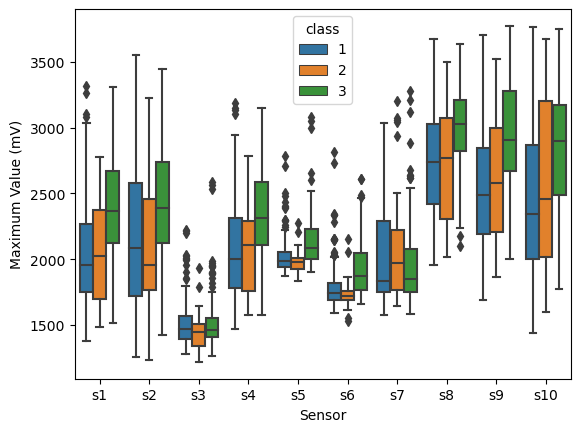

In [23]:
import seaborn as sns

# Max
data_long = pd.melt(dfVBKMax, id_vars='class', var_name='Sensor', value_name='Maximum Value (mV)')

sns.boxplot(y='Maximum Value (mV)', x='Sensor', hue='class', data=data_long)

<AxesSubplot:xlabel='Sensor', ylabel='Mean Value (mV)'>

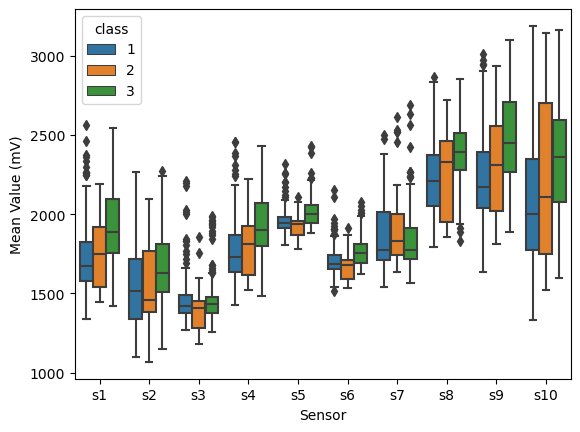

In [24]:
# Max
data_long = pd.melt(dfVBKMean, id_vars='class', var_name='Sensor', value_name='Mean Value (mV)')

sns.boxplot(y='Mean Value (mV)', x='Sensor', hue='class', data=data_long)

<AxesSubplot:xlabel='Sensor', ylabel='Standar Deviasi Value (mV)'>

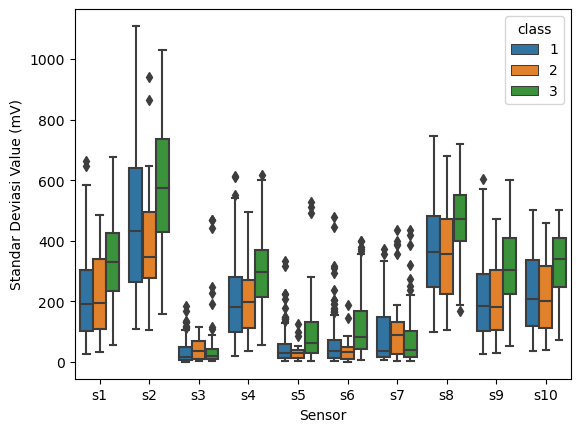

In [25]:
# MStdax
data_long = pd.melt(dfVBKStd, id_vars='class', var_name='Sensor', value_name='Standar Deviasi Value (mV)')

sns.boxplot(y='Standar Deviasi Value (mV)', x='Sensor', hue='class', data=data_long)

<AxesSubplot:xlabel='Sensor', ylabel='Variasi Value (mV)'>

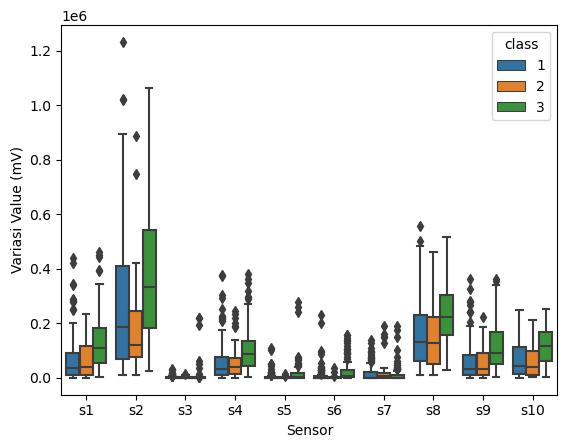

In [26]:
# Var
data_long = pd.melt(dfVBKVar, id_vars='class', var_name='Sensor', value_name='Variasi Value (mV)')

sns.boxplot(y='Variasi Value (mV)', x='Sensor', hue='class', data=data_long)

IQR remove outliers

In [27]:
# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBMax['class']
df_features = dfVBMax.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBMax = pd.concat([df_features, class_column], axis=1)

# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBMean['class']
df_features = dfVBMean.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBMean = pd.concat([df_features, class_column], axis=1)

# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBStd['class']
df_features = dfVBStd.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBStd = pd.concat([df_features, class_column], axis=1)


# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBVar['class']
df_features = dfVBVar.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBVar = pd.concat([df_features, class_column], axis=1)


# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBAll['class']
df_features = dfVBAll.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBAll = pd.concat([df_features, class_column], axis=1)


In [28]:
# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBKMax['class']
df_features = dfVBKMax.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBKMax = pd.concat([df_features, class_column], axis=1)

# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBKMean['class']
df_features = dfVBKMean.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBKMean = pd.concat([df_features, class_column], axis=1)

# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBKStd['class']
df_features = dfVBKStd.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBKStd = pd.concat([df_features, class_column], axis=1)


# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBKVar['class']
df_features = dfVBKVar.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBKVar = pd.concat([df_features, class_column], axis=1)


# Memisahkan kolom 'class' dari DataFrame
class_column = dfVBKAll['class']
df_features = dfVBKAll.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfVBKAll = pd.concat([df_features, class_column], axis=1)


In [29]:
# Memisahkan kolom 'class' dari DataFrame
class_column = dfPKMax['class']
df_features = dfPKMax.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfPKMax = pd.concat([df_features, class_column], axis=1)

# Memisahkan kolom 'class' dari DataFrame
class_column = dfPKMean['class']
df_features = dfPKMean.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfPKMean = pd.concat([df_features, class_column], axis=1)

# Memisahkan kolom 'class' dari DataFrame
class_column = dfPKStd['class']
df_features = dfPKStd.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfPKStd = pd.concat([df_features, class_column], axis=1)


# Memisahkan kolom 'class' dari DataFrame
class_column = dfPKVar['class']
df_features = dfPKVar.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfPKVar = pd.concat([df_features, class_column], axis=1)


# Memisahkan kolom 'class' dari DataFrame
class_column = dfPKAll['class']
df_features = dfPKAll.drop('class', axis=1)

# Menghitung Q1, Q3, dan IQR untuk setiap fitur
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Menentukan lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fungsi untuk mengganti outliers
def replace_outliers(column, lower, upper):
    column = column.copy()
    column[column < lower] = lower
    column[column > upper] = upper
    return column

# Mengganti outliers di setiap fitur kecuali 'class'
for feature in df_features.columns:
    df_features[feature] = replace_outliers(df_features[feature], lower_bound[feature], upper_bound[feature])

# Menggabungkan kembali fitur dengan kolom 'class'
dfPKAll = pd.concat([df_features, class_column], axis=1)


Oversampling

In [30]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan class
X = dfVBMax.drop('class', axis=1)
y = dfVBMax['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBMaxSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBMean.drop('class', axis=1)
y = dfVBMean['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBMeanSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBVar.drop('class', axis=1)
y = dfVBVar['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBVarSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBStd.drop('class', axis=1)
y = dfVBStd['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBStdSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBAll.drop('class', axis=1)
y = dfVBAll['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBAllSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)



In [31]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan class
X = dfVBKMax.drop('class', axis=1)
y = dfVBKMax['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKMaxSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBKMean.drop('class', axis=1)
y = dfVBKMean['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKMeanSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBKVar.drop('class', axis=1)
y = dfVBKVar['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKVarSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBKStd.drop('class', axis=1)
y = dfVBKStd['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKStdSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBKAll.drop('class', axis=1)
y = dfVBKAll['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKAllSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)



In [32]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan class
X = dfPKMax.drop('class', axis=1)
y = dfPKMax['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKMaxSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfPKMean.drop('class', axis=1)
y = dfPKMean['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKMeanSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfPKVar.drop('class', axis=1)
y = dfPKVar['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKVarSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfPKStd.drop('class', axis=1)
y = dfPKStd['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKStdSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfPKAll.drop('class', axis=1)
y = dfPKAll['class']

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKAllSmote = pd.concat([X_resampled_df, y_resampled_df], axis=1)



ADASYN

In [33]:
from imblearn.over_sampling import ADASYN

# Memisahkan fitur dan class
X = dfVBMax.drop('class', axis=1)
y = dfVBMax['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBMaxAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBMean.drop('class', axis=1)
y = dfVBMean['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBMeanAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBVar.drop('class', axis=1)
y = dfVBVar['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBVarAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBStd.drop('class', axis=1)
y = dfVBStd['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBStdAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBAll.drop('class', axis=1)
y = dfVBAll['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBAllAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)



In [34]:
from imblearn.over_sampling import ADASYN

# Memisahkan fitur dan class
X = dfPKMax.drop('class', axis=1)
y = dfPKMax['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKMaxAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfPKMean.drop('class', axis=1)
y = dfPKMean['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKMeanAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfPKVar.drop('class', axis=1)
y = dfPKVar['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKVarAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfPKStd.drop('class', axis=1)
y = dfPKStd['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKStdAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfPKAll.drop('class', axis=1)
y = dfPKAll['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfPKAllAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)



In [35]:
from imblearn.over_sampling import ADASYN

# Memisahkan fitur dan class
X = dfVBKMax.drop('class', axis=1)
y = dfVBKMax['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42,sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKMaxAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBKMean.drop('class', axis=1)
y = dfVBKMean['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42,sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKMeanAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBKVar.drop('class', axis=1)
y = dfVBKVar['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42,sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKVarAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBKStd.drop('class', axis=1)
y = dfVBKStd['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42,sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKStdAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Memisahkan fitur dan class
X = dfVBKAll.drop('class', axis=1)
y = dfVBKAll['class']

# Melakukan oversampling dengan adasyn
adasyn = ADASYN(random_state=42,sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Mengonversi hasil kembali ke DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Menggabungkan kembali fitur dan class
dfVBKAllAdasyn = pd.concat([X_resampled_df, y_resampled_df], axis=1)

Chosse best Parameter in smoothe and adasyn and Fe

SMote

In [36]:
import pandas as pd

def evaluate(model, X_train, y_train, X_test, y_test):
    # Print parameter terbaik
    print(model.best_params_)
    
    # Print skor model
    print('Accuracy train:',model.score(X_train, y_train))
    print('Accuracy test:',model.score(X_test, y_test))
    
    
    # Mengakses hasil pencarian
    cv_results = model.cv_results_
    
    # Mendapatkan parameter terbaik
    best_params = model.best_params_
    print(f"Best parameters: {best_params}")
    
    # Mengonversi cv_results_ menjadi DataFrame untuk memudahkan analisis
    results_df = pd.DataFrame(cv_results)
    
    # Menemukan indeks dari parameter terbaik
    best_index = results_df['params'].tolist().index(best_params)
    
    # Menampilkan hasil 10 fold untuk parameter terbaik
    best_fold_results = results_df.iloc[best_index][[
        'split0_test_score', 'split1_test_score', 'split2_test_score',
        'split3_test_score', 'split4_test_score', 'split5_test_score',
        'split6_test_score', 'split7_test_score', 'split8_test_score',
        'split9_test_score'
    ]]
    
    # Buat DataFrame dari best_fold_results
    best_fold_results_df = pd.DataFrame(best_fold_results)
    
    # Hitung nilai rata-rata
    mean_value = best_fold_results_df.mean()
    
    # Hitung standar deviasi
    std_deviation = best_fold_results_df.std()
    
    # Print hasil
    print('10 fold accuracy:')
    print(pd.DataFrame(best_fold_results))
    print("Mean CV:", mean_value)
    print("Std CV:", std_deviation)

# Contoh pemanggilan fungsi
# print_grid_search_results(model, X_train, y_train, X_test, y_test)


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKMaxSmote.drop('class', axis=1)
y = dfVBKMaxSmote['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKMaxSmote.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK Max Smote.pkl')


Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.6451612903225806
Accuracy test: 0.6237623762376238
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score  0.536585
split1_test_score  0.682927
split2_test_score  0.682927
split3_test_score      0.65
split4_test_score      0.55
split5_test_score       0.7
split6_test_score       0.6
split7_test_score     0.625
split8_test_score     0.575
split9_test_score       0.7
Mean CV: 0    0.630244
dtype: object
Std CV: 0    0.062252
dtype: object
Model is pickled as model/try LDA VBK Max Smote.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKMeanSmote.drop('class', axis=1)
y = dfVBKMeanSmote['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKMeanSmote.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK Mean Smote.pkl')


Fitting 10 folds for each of 66 candidates, totalling 660 fits


{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.6104218362282878
Accuracy test: 0.6138613861386139
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score  0.512195
split1_test_score  0.609756
split2_test_score  0.560976
split3_test_score       0.6
split4_test_score     0.525
split5_test_score     0.725
split6_test_score       0.6
split7_test_score      0.55
split8_test_score     0.425
split9_test_score     0.775
Mean CV: 0    0.588293
dtype: object
Std CV: 0    0.10163
dtype: object
Model is pickled as model/try LDA VBK Mean Smote.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKStdSmote.drop('class', axis=1)
y = dfVBKStdSmote['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKStdSmote.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK Std Smote.pkl')



Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.6426799007444168
Accuracy test: 0.6336633663366337
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score  0.512195
split1_test_score  0.585366
split2_test_score  0.634146
split3_test_score       0.7
split4_test_score     0.575
split5_test_score      0.65
split6_test_score       0.7
split7_test_score       0.5
split8_test_score     0.625
split9_test_score     0.725
Mean CV: 0    0.620671
dtype: object
Std CV: 0    0.077597
dtype: object
Model is pickled as model/try LDA VBK Std Smote.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKVarSmote.drop('class', axis=1)
y = dfVBKVarSmote['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKVarSmote.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK Var Smote.pkl')



Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.6426799007444168
Accuracy test: 0.6633663366336634
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score  0.463415
split1_test_score  0.585366
split2_test_score  0.609756
split3_test_score       0.7
split4_test_score      0.65
split5_test_score       0.7
split6_test_score      0.65
split7_test_score      0.45
split8_test_score       0.6
split9_test_score      0.75
Mean CV: 0    0.615854
dtype: object
Std CV: 0    0.098009
dtype: object
Model is pickled as model/try LDA VBK Var Smote.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKAllSmote.drop('class', axis=1)
y = dfVBKAllSmote['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKAllSmote.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK All Smote.pkl')



Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.771712158808933
Accuracy test: 0.7326732673267327
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score  0.756098
split1_test_score  0.707317
split2_test_score  0.658537
split3_test_score     0.725
split4_test_score       0.7
split5_test_score     0.775
split6_test_score       0.7
split7_test_score       0.7
split8_test_score      0.65
split9_test_score     0.825
Mean CV: 0    0.719695
dtype: object
Std CV: 0    0.053141
dtype: object
Model is pickled as model/try LDA VBK All Smote.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

Adasyn

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKMaxAdasyn.drop('class', axis=1)
y = dfVBKMaxAdasyn['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKMaxAdasyn.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK Max Adasyn.pkl')



Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'lsqr', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.6575
Accuracy test: 0.6
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'lsqr', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                       2
split0_test_score   0.65
split1_test_score    0.6
split2_test_score    0.6
split3_test_score    0.6
split4_test_score  0.675
split5_test_score   0.75
split6_test_score   0.65
split7_test_score   0.65
split8_test_score  0.675
split9_test_score  0.575
Mean CV: 2    0.6425
dtype: object
Std CV: 2    0.051438
dtype: object
Model is pickled as model/try LDA VBK Max Adasyn.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKMeanAdasyn.drop('class', axis=1)
y = dfVBKMeanAdasyn['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKMeanAdasyn.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK Mean Adasyn.pkl')



Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.6224489795918368
Accuracy test: 0.6262626262626263
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score     0.525
split1_test_score     0.575
split2_test_score  0.589744
split3_test_score  0.564103
split4_test_score  0.615385
split5_test_score  0.564103
split6_test_score   0.74359
split7_test_score  0.564103
split8_test_score  0.641026
split9_test_score  0.666667
Mean CV: 0    0.604872
dtype: object
Std CV: 0    0.064088
dtype: object
Model is pickled as model/try LDA VBK Mean Adasyn.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKStdAdasyn.drop('class', axis=1)
y = dfVBKStdAdasyn['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKStdAdasyn.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK Std Adasyn.pkl')



Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.6282051282051282
Accuracy test: 0.6224489795918368
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score  0.538462
split1_test_score  0.538462
split2_test_score  0.641026
split3_test_score  0.692308
split4_test_score  0.564103
split5_test_score  0.615385
split6_test_score  0.589744
split7_test_score  0.615385
split8_test_score  0.666667
split9_test_score  0.538462
Mean CV: 0    0.6
dtype: object
Std CV: 0    0.055654
dtype: object
Model is pickled as model/try LDA VBK Std Adasyn.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKVarAdasyn.drop('class', axis=1)
y = dfVBKVarAdasyn['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKVarAdasyn.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK Var Adasyn.pkl')



Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.6072351421188631
Accuracy test: 0.5463917525773195
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score  0.615385
split1_test_score  0.717949
split2_test_score  0.589744
split3_test_score  0.589744
split4_test_score  0.564103
split5_test_score  0.512821
split6_test_score  0.641026
split7_test_score  0.421053
split8_test_score  0.684211
split9_test_score  0.578947
Mean CV: 0    0.591498
dtype: object
Std CV: 0    0.084172
dtype: object
Model is pickled as model/try LDA VBK Var Adasyn.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan class
X = dfVBKAllAdasyn.drop('class', axis=1)
y = dfVBKAllAdasyn['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Definisikan preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), dfVBKAllAdasyn.drop(columns='class').columns)
])

# Buat pipeline dengan LDA
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

# Tentukan parameter grid untuk pencarian grid
parameter = {
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto'] + [x/10.0 for x in range(1, 10)]  # shrinkage hanya untuk lsqr dan eigen
}

# Buat objek GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='try LDA VBK All Adasyn.pkl')



Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.8191214470284238
Accuracy test: 0.6907216494845361
Best parameters: {'lda__shrinkage': None, 'lda__solver': 'svd', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                          0
split0_test_score  0.666667
split1_test_score   0.74359
split2_test_score  0.820513
split3_test_score  0.820513
split4_test_score   0.74359
split5_test_score   0.74359
split6_test_score  0.794872
split7_test_score  0.684211
split8_test_score  0.763158
split9_test_score  0.736842
Mean CV: 0    0.751754
dtype: object
Std CV: 0    0.051282
dtype: object
Model is pickled as model/try LDA VBK All Adasyn.pkl


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solv

LDA Ploting

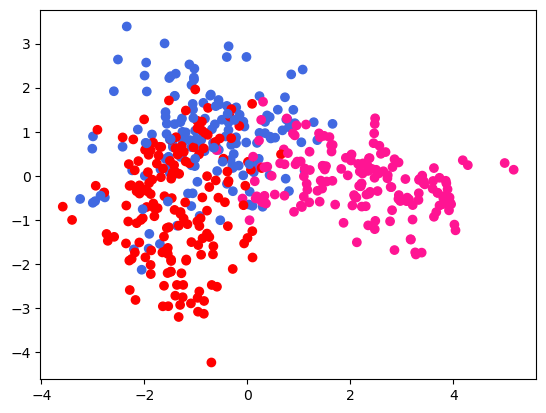

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan class
X = dfVBKAllSmote.drop('class', axis=1)
y = dfVBKAllSmote['class']

lda = LDA(n_components=2)
X_R = lda.fit_transform(X, y)

from pylab import *

colors = ['maroon','royalblue','deeppink','red',  'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
subplot(1,1,1)
plt.scatter(X_R[:,0],X_R[:,1],c=vectorizer(y))



Modeling

In [68]:
from sklearn.svm import SVC

X = dfVBKAllAdasyn.drop(columns="class")
y = dfVBKAllAdasyn['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2,scaling='maxabs'), dfVBKAllAdasyn.drop(columns='class').columns)
])
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

parameter={
    'prep__numeric__poly__degree': [1],
    'prep__numeric__poly__interaction_only': [True, False],
    'algo__gamma': ([1,1.1,1.2,0.9,0.8]),
    'algo__C': ([100,99,98,101,102]),
 }

model = GridSearchCV(pipeline,gsp.svm_poly_params, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='SVM VBK All Adasyn.pkl')



Fitting 10 folds for each of 294 candidates, totalling 2940 fits


c:\Users\Acer\miniconda3\envs\env1\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 100.0, 'algo__gamma': 0.01, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': False}
Accuracy train: 0.8888888888888888
Accuracy test: 0.8247422680412371
Best parameters: {'algo__C': 100.0, 'algo__gamma': 0.01, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': False}
10 fold accuracy:
                        219
split0_test_score  0.794872
split1_test_score  0.820513
split2_test_score  0.948718
split3_test_score  0.820513
split4_test_score  0.794872
split5_test_score  0.871795
split6_test_score  0.871795
split7_test_score  0.763158
split8_test_score  0.868421
split9_test_score  0.815789
Mean CV: 219    0.837045
dtype: object
Std CV: 219    0.05363
dtype: object
Model is pickled as model/SVM VBK All Adasyn.pkl


In [69]:

from sklearn.neighbors import KNeighborsClassifier

X = dfVBKAllAdasyn.drop(columns="class")
y = dfVBKAllAdasyn['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2,scaling='robust'), dfVBKAllAdasyn.drop(columns='class').columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp


model = GridSearchCV(pipeline, gsp.knn_poly_params, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='KNN VBK All Adasyn.pkl')



Fitting 10 folds for each of 540 candidates, totalling 5400 fits
{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__weights': 'uniform', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 1.0
Accuracy test: 0.8247422680412371
Best parameters: {'algo__n_neighbors': 1, 'algo__p': 2, 'algo__weights': 'uniform', 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                         24
split0_test_score  0.871795
split1_test_score  0.794872
split2_test_score  0.820513
split3_test_score  0.871795
split4_test_score  0.769231
split5_test_score  0.820513
split6_test_score  0.717949
split7_test_score  0.815789
split8_test_score  0.789474
split9_test_score  0.842105
Mean CV: 24    0.811404
dtype: object
Std CV: 24    0.046772
dtype: object
Model is pickled as model/KNN VBK All Adasyn.pkl


In [70]:
from sklearn.linear_model import LogisticRegression

X = dfVBKAllAdasyn.drop(columns="class")
y = dfVBKAllAdasyn['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2,scaling='robust'), dfVBKAllAdasyn.drop(columns='class').columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42)),
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp


model = GridSearchCV(pipeline, gsp.logreg_poly_params, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test)
save_model(model=model,file_name='LogReg VBK All Adasyn.pkl')




Fitting 10 folds for each of 84 candidates, totalling 840 fits
{'algo__C': 0.1, 'algo__fit_intercept': False, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
Accuracy train: 0.8837209302325582
Accuracy test: 0.7835051546391752
Best parameters: {'algo__C': 0.1, 'algo__fit_intercept': False, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
10 fold accuracy:
                         34
split0_test_score  0.794872
split1_test_score  0.794872
split2_test_score  0.897436
split3_test_score  0.846154
split4_test_score  0.769231
split5_test_score  0.846154
split6_test_score  0.820513
split7_test_score  0.710526
split8_test_score  0.894737
split9_test_score  0.789474
Mean CV: 34    0.816397
dtype: object
Std CV: 34    0.057327
dtype: object
Model is pickled as model/LogReg VBK All Adasyn.pkl
